# Discretizing, Normalizing, Scaling, Standardizing

* __Author: Prof. Nagiza F. Samatova__
* __Email: samatova@csc.ncsu.edu__
* __Date: September 25, 2018__

## Install packages
Install the following packages if not installed:

>```python
pip3 install pandas
pip3 install sklearn
pip3 install scipy
pip3 install numpy
pip3 install matplotlib
```

# Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import sklearn.cluster
import sklearn.metrics.pairwise
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy

# Getting Familiar with the Data

In [2]:
customers = pd.read_csv("../data_raw/data_prep_linear_transform_customers.csv")
customers.head()

,state.of.res,custid,sex,is.employed,income,marital.stat,health.ins,housing.type,recent.move,num.vehicles,age,is.employed.fix1,Median.Income,income.norm,gp,income.lt.30K,age.range,Income
0,Alabama,1063014,F,True,82000,Married,True,Rented,False,2.0,43.0,employed,52371,1.565752,0.935060,False,"(25,65]",NaN
1,Alabama,1192089,M,NaN,49000,Married,True,Homeowner free and clear,False,2.0,77.0,missing,52371,0.935632,0.116241,False,"(65,Inf]",NaN
2,Alabama,16551,F,NaN,7000,Married,True,Homeowner with mortgage/loan,False,2.0,46.0,missing,52371,0.133662,0.990683,True,"(25,65]",4500.0
3,Alabama,1079878,F,NaN,37200,Divorced/Separated,True,Homeowner with mortgage/loan,False,1.0,62.0,missing,52371,0.710317,0.187356,False,"(25,65]",20000.0
4,Alabama,502705,M,True,70000,Married,False,Rented,False,4.0,37.0,employed,52371,1.336618,0.849024,False,"(25,65]",12000.0


In [3]:
customers.iloc[0][:]

state.of.res         Alabama
custid               1063014
sex                        F
is.employed             True
income                 82000
marital.stat         Married
health.ins              True
housing.type          Rented
recent.move            False
num.vehicles               2
age                       43
is.employed.fix1    employed
Median.Income          52371
income.norm          1.56575
gp                   0.93506
income.lt.30K          False
age.range            (25,65]
Income                   NaN
Name: 0, dtype: object

# Discretization with `cut()`: Converting Continuous Variables to Discrete

+ Discretizing continuous variables to discrete is useful when the relationship between input and output isn't linear, but a modeling technique, such as regression, assumes it is. 
+ Moreover, for some continuous variables, the exact value matters less than whether they fall into a certain range:
    * E.g.: customers younger than 25 or older than 65 have high probabilities of insurance coverage 
    * E.g.: customers with income less thab $25,000 have different health insurance than customers with higher incomes

In [4]:
customers['low_income'] = (customers['income'] < 20000)

customers['low_income'].value_counts()

False    678
True     322
Name: low_income, dtype: int64

Let's convert age into ranges using `pd.cut()` function:

In [5]:
bins = [0, 25, 65, float("inf")]
customers['age_groups'] = pd.cut(customers.age, bins, include_lowest=True)

In [6]:
customers['age_groups_names'] = pd.cut(customers.age, bins, 
                                       labels=["Young", "Middle Age", "Older"], 
                                       include_lowest=True)
customers['age_groups'].value_counts()

(25.0, 65.0]      732
(65.0, inf]       212
(-0.001, 25.0]     56
Name: age_groups, dtype: int64

In [7]:
customers['age_groups_names'].value_counts()

Middle Age    732
Older         212
Young          56
Name: age_groups_names, dtype: int64

# Normalization

+ _Normalization_ is useful when absolute quantities are less meaningful than relative quantities that can be:
    * _external_ (come from analyst's domain knowledge) or 
    * _internal_ (derived from the data)
+ Examples:
    * normalizing income relative to another meaningful quantity: median income
    * rather than considering customer's absolute age, consider how old or young they are relative to a "typical" customer, with the mean age of customers being treated as the typical age

In [8]:
customers['age'].describe()

count    1000.000000
mean       51.699815
std        18.863433
min         0.000000
25%        38.000000
50%        50.000000
75%        64.000000
max       146.680197
Name: age, dtype: float64

In [9]:
customers['age'].std()

18.863433410681736

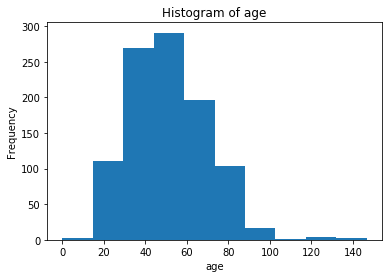

In [10]:
plt.hist(customers['age'])
plt.title("Histogram of age")
plt.xlabel("age")
plt.ylabel("Frequency")
plt.show()

Note that there are a few values of age above 100, with the maximum age of 146. Those values are probably poor data entry. Let's treat all the values of age above 100 as missing values:

In [11]:
np.where?

In [14]:
customers['age_cleaned'] = np.where(customers['age'] > 100, np.nan, customers.age)
customers['age_cleaned'].describe()

count    992.000000
mean      51.069556
std       17.557178
min        0.000000
25%       38.000000
50%       50.000000
75%       63.000000
max       93.000000
Name: age_cleaned, dtype: float64

In [46]:
customers.hist?

Text(0,0.5,'Frequency')

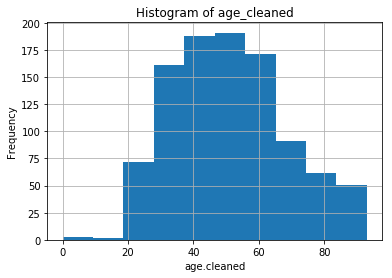

In [15]:
customers.hist(column = 'age_cleaned', grid = True)
plt.title("Histogram of age_cleaned")
plt.xlabel("age.cleaned")
plt.ylabel("Frequency")
#plt.show()

Now let's normalize the `age` by its mean value:

In [16]:
mean_age = customers['age_cleaned'].mean(skipna=True)
mean_age

51.069556451612904

In [17]:
customers['age_mean_normalized'] = customers['age_cleaned']/ mean_age
customers.age_mean_normalized.describe()

count    992.000000
mean       1.000000
std        0.343790
min        0.000000
25%        0.744083
50%        0.979057
75%        1.233612
max        1.821046
Name: age_mean_normalized, dtype: float64

In [18]:
customers['age_cleaned'].std(skipna=True)

17.557177763640016

Text(0,0.5,'Frequency')

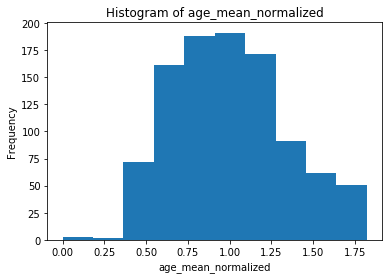

In [19]:
plt.hist(customers.age_mean_normalized.dropna())
#customers.hist(column = 'age_mean_normalized', grid = True)

plt.title("Histogram of age_mean_normalized")
plt.xlabel("age_mean_normalized")
plt.ylabel("Frequency")

A value of `age.normalized` that is much less than 1 signifies an unusually young customer; much greater than 1 signifies an unusially old customer. What constitutes "much less" or "much greater" than 1 depends on how wide an age spread the customers tend to be, as summerized by the standard deviation of the age.

# Standardization: Z-scores

To ensure comparability among different variables, it is common to _rescale_ the data by using standard deviation as a unit of distance:

+ _Z-score standardization_: subtracts the mean (i.e., centers) and divides by standard deviation
    * applied to symmetrically distributed data, such as normal distribution data
    * if the distribution is skewed, then transformations for skewed and wide distributions should be applied first _before_ Z-scores are computed 
+ Z-score values less than -1 signify values smaller than typical
+ Z-score values greater than 1 signify values greater than typical
+ The mean of Z-scores is zero
+ Standard deviation of the Z-scores is 1

In [20]:
customers['age_z_scores'] = (customers['age_cleaned']-mean_age)/customers['age_cleaned'].std()
customers.age_z_scores.describe()

count    9.920000e+02
mean    -3.301570e-17
std      1.000000e+00
min     -2.908757e+00
25%     -7.443996e-01
50%     -6.091847e-02
75%      6.795194e-01
max      2.388222e+00
Name: age_z_scores, dtype: float64

In [21]:
customers['age_z_scores'].head()

0   -0.459616
1    1.476914
2   -0.288746
3    0.622563
4   -0.801356
Name: age_z_scores, dtype: float64

Text(0,0.5,'Frequency')

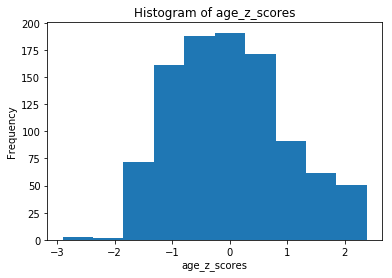

In [22]:
plt.hist(customers.age_z_scores.dropna(),
        range=(min(customers.age_z_scores), 
               max(customers.age_z_scores)))
plt.title("Histogram of age_z_scores")
plt.xlabel("age_z_scores")
plt.ylabel("Frequency")

# Standardization for Comparability

Let's extract a few variables of interest that will be used to measure the proximity (i.e., distance) between the customers:

In [23]:
var_roi = ["income", "age_cleaned"]
customers_roi = customers[var_roi]
customers_roi.describe()

,income,age_cleaned
count,1000.000000,992.000000
mean,53504.771000,51.069556
std,65478.065729,17.557178
min,-8700.000000,0.000000
25%,14600.000000,38.000000
50%,35000.000000,50.000000
75%,67000.000000,63.000000
max,615000.000000,93.000000


Note that there is a negative value for the income (`min = -8700`). Since income can not be negative, let's assume that there was an error in the data entry. Let's replace all the negative values with `NAs`:

Text(0,0.5,'Frequency')

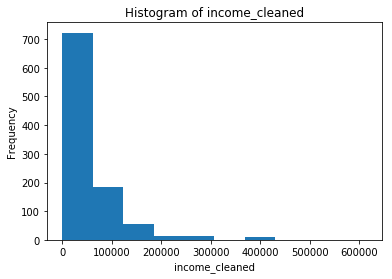

In [24]:
customers['income_cleaned'] = np.where(customers.income < 0.0, np.nan, customers.income)
plt.hist(customers['income_cleaned'].dropna(), 
         range=(min(customers['income_cleaned']), 
                max(customers['income_cleaned'])))
plt.title("Histogram of income_cleaned")
plt.xlabel("income_cleaned")
plt.ylabel("Frequency")

In [25]:
var_roi = ["income_cleaned", "age_cleaned"]
customers_roi = customers[var_roi]
customers_roi.describe()

,income_cleaned,age_cleaned
count,999.000000,992.000000
mean,53567.038038,51.069556
std,65481.233889,17.557178
min,0.000000,0.000000
25%,14700.000000,38.000000
50%,35000.000000,50.000000
75%,67000.000000,63.000000
max,615000.000000,93.000000


Note that the two variables, `income` and `age`, are on different scales with `income` being orders of magnitude larger than `age`.

If we have to compute the pair-wise distances between customers, then it is likely that the differences in `income` will dominate the measure of proximity and differences in `age` will have little influence. For the purpose of illustration, let's compute the pair-wise distance matrix for the first few customers:

In [26]:
rows_roi = [753, 468, 111, 427, 486, 996, 213, 187]
customers_roi.iloc[rows_roi, :]

,income_cleaned,age_cleaned
753,2000.0,28.0
468,15200.0,65.0
111,60000.0,85.0
427,61000.0,35.0
486,45500.0,40.0
996,15900.0,88.0
213,26000.0,54.0
187,170000.0,34.0


In [122]:
scipy.spatial.distance.pdist?

In [27]:
matrix = scipy.spatial.distance.pdist(customers_roi.iloc[rows_roi, :],
                                     metric='euclidean')
matrix

array([ 13200.05185596,  58000.02800861,  59000.00041525,  43500.00165517,
        13900.1294958 ,  24000.01408333, 168000.00010714,  44800.00446429,
        45800.00982533,  30300.01031353,    700.37775521,  10800.00560185,
       154800.00310401,   1001.24921973,  14500.06982742,  44100.00010204,
        34000.01413235, 110000.01182273,  15500.00080645,  45100.0311419 ,
        35000.00515714, 109000.00000459,  29600.03891889,  19500.00502564,
       124500.00014458,  10100.05722756, 154100.00946139, 144000.00138889])

Now let's visualize the results of clustering the customers that are the closest into the same group and customers that are the farthest into different groups using this distance matrix:

In [115]:
linkage?

In [28]:
Z = linkage(matrix, 
            method='ward', 
            metric='euclidean')

{'color_list': ['g', 'g', 'g', 'g', 'g', 'g', 'b'],
 'dcoord': [[0.0, 1001.2492197250393, 1001.2492197250393, 0.0],
  [0.0, 17320.523471689106, 17320.523471689106, 1001.2492197250393],
  [0.0, 700.3777552149983, 700.3777552149983, 0.0],
  [0.0, 12066.648595750741, 12066.648595750741, 700.3777552149983],
  [0.0, 20861.5480769445, 20861.5480769445, 12066.648595750741],
  [17320.523471689106, 75408.0477934803, 75408.0477934803, 20861.5480769445],
  [0.0, 182254.4713001381, 182254.4713001381, 75408.0477934803]],
 'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [45.0, 45.0, 62.5, 62.5],
  [22.5, 22.5, 53.75, 53.75],
  [5.0, 5.0, 38.125, 38.125]],
 'ivl': [187, 486, 111, 427, 753, 213, 468, 996],
 'leaves': [7, 4, 2, 3, 0, 6, 1, 5]}

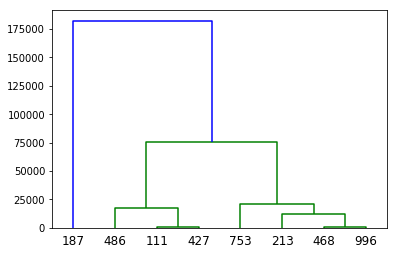

In [29]:
dendrogram(Z, labels=np.array([753, 468, 111, 427, 486, 996, 213, 187]))  

Now, let's first standardize these variables of interest to their $Z$-scores and repeat the clustering.

The histogram of the `income.cleaned` is right-skewed, which is not symmetric. Before converting this variable to its standardized $Z$-score, let's first transform this variable to a more symmetric distribution. Because it is _right-skewed_, we need to compress its large values by descending the ladder of powers ($p < 1$):

Text(0,0.5,'Frequency')

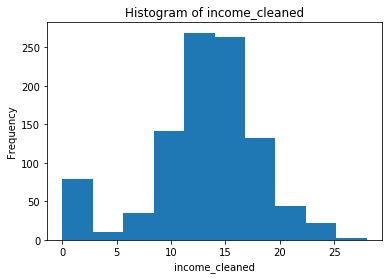

In [30]:
p = 0.25
plt.hist(customers['income_cleaned'].dropna() ** p , 
         range=(min(customers['income_cleaned']**p),
                max(customers['income_cleaned']**p)))
plt.title("Histogram of income_cleaned")
plt.xlabel("income_cleaned")
plt.ylabel("Frequency")

In [31]:
customers['income_transformed'] = customers.income_cleaned ** p
customers['income_transformed'].head()

0    16.922069
1    14.878153
2     9.146912
3    13.887873
4    16.265766
Name: income_transformed, dtype: float64

In [32]:
customers['income_z_scores'] = (customers.income_transformed - customers.income_transformed.mean(skipna=True)) / customers.income_transformed.std(skipna=True)
customers['income_z_scores'].head()

0    0.744679
1    0.353750
2   -0.742433
3    0.164345
4    0.619151
Name: income_z_scores, dtype: float64

In [33]:
var_zscores_roi = ["income_z_scores", "age_z_scores"]
customers_zscores_roi = customers[var_zscores_roi]
customers_zscores_roi.describe()

,income_z_scores,age_z_scores
count,9.990000e+02,9.920000e+02
mean,4.986279e-16,-3.301570e-17
std,1.000000e+00,1.000000e+00
min,-2.491914e+00,-2.908757e+00
25%,-3.858959e-01,-7.443996e-01
50%,1.241697e-01,-6.091847e-02
75%,5.852689e-01,6.795194e-01
max,2.864244e+00,2.388222e+00


In [34]:
customers_zscores_roi.iloc[rows_roi, :]

,income_z_scores,age_z_scores
753,-1.212850,-1.313967
468,-0.368202,0.793433
111,0.501539,1.932568
427,0.513934,-0.915270
486,0.301514,-0.630486
996,-0.344163,2.103438
213,-0.063191,0.166909
187,1.391796,-0.972227


In [35]:
d_zscores = scipy.spatial.distance.pdist(customers_roi.iloc[rows_roi, :],
                                     metric='euclidean')
d_zscores

array([ 13200.05185596,  58000.02800861,  59000.00041525,  43500.00165517,
        13900.1294958 ,  24000.01408333, 168000.00010714,  44800.00446429,
        45800.00982533,  30300.01031353,    700.37775521,  10800.00560185,
       154800.00310401,   1001.24921973,  14500.06982742,  44100.00010204,
        34000.01413235, 110000.01182273,  15500.00080645,  45100.0311419 ,
        35000.00515714, 109000.00000459,  29600.03891889,  19500.00502564,
       124500.00014458,  10100.05722756, 154100.00946139, 144000.00138889])

In [109]:
linkage?

In [128]:
# from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(matrix, 
            method='ward', 
            metric='euclidean')

{'color_list': ['g', 'g', 'g', 'g', 'g', 'g', 'b'],
 'dcoord': [[0.0, 1001.2492197250393, 1001.2492197250393, 0.0],
  [0.0, 17320.523471689106, 17320.523471689106, 1001.2492197250393],
  [0.0, 700.37775521499827, 700.37775521499827, 0.0],
  [0.0, 12066.648595750741, 12066.648595750741, 700.37775521499827],
  [0.0, 20861.548076944498, 20861.548076944498, 12066.648595750741],
  [17320.523471689106,
   75408.047793480306,
   75408.047793480306,
   20861.548076944498],
  [0.0, 182254.4713001381, 182254.4713001381, 75408.047793480306]],
 'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [45.0, 45.0, 62.5, 62.5],
  [22.5, 22.5, 53.75, 53.75],
  [5.0, 5.0, 38.125, 38.125]],
 'ivl': [187, 486, 111, 427, 753, 213, 468, 996],
 'leaves': [7, 4, 2, 3, 0, 6, 1, 5]}

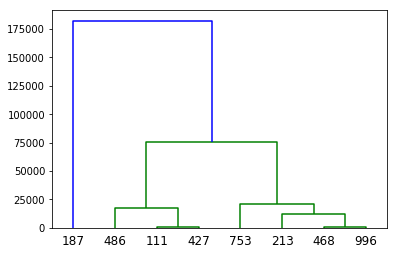

In [131]:
dendrogram(Z, labels=np.array([753, 468, 111, 427, 486, 996, 213, 187]))  

### Saving Cleaned Data

In [36]:
customers.to_csv('../data_output/customers.cleaned.csv')